# Training a shallow network to solve the XOR problem 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

In [2]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)

First, we generate a dataset of n examples, using normally distributed deviations from the mean.

In [3]:
# training data size: must be divisible by 4
n = 120

x1 = np.array([0] * (n//2) + [1] * (n//2))
x2 = np.array(([0] * (n//4) + [1] * (n//4)) * 2)

y = np.logical_xor(x1,x2).astype(int)



# add normally distributed (and clipped) variation to x values
std_var = 0.05
clip_var = 0.3


var1 = np.random.normal(0,std_var,n)
var1 = np.clip(var1, -clip_var, clip_var)
x1 = x1 + var1

var2 = np.random.normal(0,std_var,n)
var2 = np.clip(var2, -clip_var, clip_var)
x2 = x2 + var2

# plt.scatter(x1,x2, c=y)

Text(0, 0.5, '$x_2$')

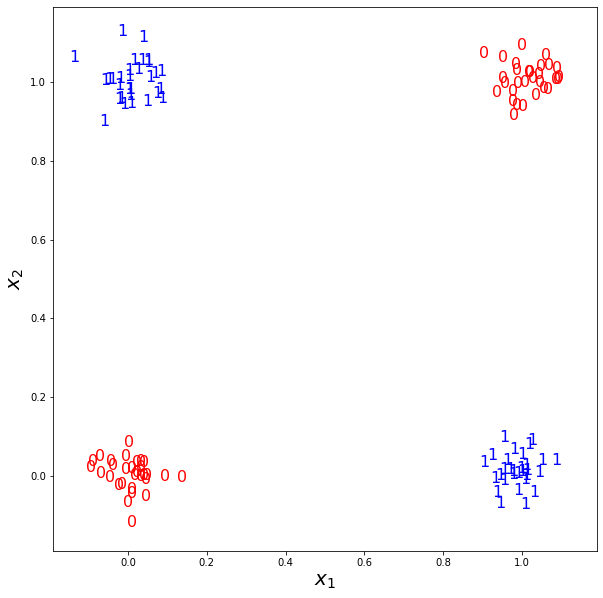

In [4]:


plt.figure(figsize=(10, 10))

plt.axis('scaled')
plt.xlim(-0.19, 1.19)
plt.ylim(-0.19, 1.19)


for x1i, x2i, yi in zip(x1,x2,y):
    
    c = "red" if yi == 0 else "blue"
    plt.text(x1i, x2i, str(yi), color=c, fontsize=16)
    

plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
    

        


Now, we define some important functions.

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def sigmoidprime(z):
    return sigmoid(z) * (1-sigmoid(z))

We define the softplus function only for evaluating the cost for testing purposes.

In [7]:
def bce_cost(phat,ylab):
    return -(ylab * np.log(phat) + (1-ylab) * np.log(1 - phat))

Now, we introduce our network object.

In [8]:
class ShallowNetwork:
    
    def __init__(self):
        
        self.W1 = np.zeros((2,2))
        self.b1 = np.zeros(2)
        
        self.W2 = np.zeros(2)
        self.b2 = 0
    
    def set_rand_weights(self,weight_scale=0.2):
        # initialise the weights to uniform random values in interval [-weight_scale/2, weight_scale/2].
        # initialise the biases to have 0 entries.
        
        self.W1 = weight_scale * (np.random.rand(2,2)  - 0.5)
        self.b1 = np.zeros(2)
        
        self.W2 = weight_scale * (np.random.rand(2) - 0.5)
        self.b2 = 0
        
    def train(self, x1, x2, y, eta):
        # Apply gradient descent on a single training example, with learning rate eta
        
        x = np.array([x1,x2])

        # FORWARD PASS

        z1  = np.matmul(self.W1, x) + self.b1


        a1 = sigmoid(z1)


        z2 = float(np.dot(self.W2, a1) + self.b2)

        a2 = sigmoid(z2)



        # BACKWARD PASS

        d2 = sigmoid((1 - 2 * y) * z2) * (1 - 2 * y)


        d1A = self.W2 * d2
        d1B = sigmoidprime(z1)

        d1 = np.multiply(d1A,d1B)



        # Calculate gradient


        gradW1 = np.outer(d1, x)
        gradb1 = d1

        gradW2 = d2 * a1
        gradb2 = d2

        self.W1 -= eta * gradW1
        self.b1 -= eta * gradb1
        
        self.W2 -= eta * gradW2
        self.b2 -= eta * gradb2
    
    
    
    
    
    
    def predict(self, x1,x2):
        # predict class in {0,1} given input x = (x1,x2)
        
        a2 = self.a2(x1,x2)
        
        return 1 if a2 > 0.5 else 0
    
    
    
    def a2(self, x1,x2):
        
        # evaluate final activation a2 given input x = (x1,x2)
        
        x = np.array([x1,x2])

        # FORWARD PASS

        z1  = np.matmul(self.W1, x) + self.b1


        a1 = sigmoid(z1)


        z2 = float(np.dot(self.W2, a1) + self.b2)

        a2 = sigmoid(z2)
        
        return a2
    
    
    def correct(self):
        # counts the number of correct predictions from the original XOR set
        
        correct_counter = 0
        
        if self.predict(0,0) == 0: correct_counter += 1
        if self.predict(0,1) == 1: correct_counter += 1
        if self.predict(1,0) == 1: correct_counter += 1
        if self.predict(1,1) == 0: correct_counter += 1

        return correct_counter
            
            
    def params(self):
        # print the network parameters
        
        print(f"W1 = {self.W1}")
        print(f"W2 = {self.W2}")
        print(f"b1 = {self.b1}")
        print(f"b2 = {self.b2}")
        
    
    def cost(self, x1dat, x2dat, ydat):
        # calculate the cost (the average loss) over the entire dataset
        
        total_loss = 0
        
        for x1i, x2i, yi in zip(x1dat,x2dat,ydat):
            
            phat = self.a2(x1i,x2i)
            
            total_loss += bce_cost(phat, yi)
            
        return total_loss / len(x1dat)
    
    
    
    def plot(self, x1dat, x2dat, ydat):
        
        # Function adapted from
        # https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7
        
        
        # set figure axes
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        
        pad = 0.18
        plt.xlim(0-pad, 1 + pad)
        plt.ylim(0-pad, 1 + pad)
        
        plt.xlabel("$x_1$",fontsize=20)
        plt.ylabel("$x_2$",fontsize=20)

        # plot data points
        for x1i, x2i, yi in zip(x1dat,x2dat,ydat):
    
            c = "red" if yi == 0 else "blue"
            plt.text(x1i, x2i, str(yi), color=c, fontsize=16)
        
        # plot decision contour
        h=0.005
        x_range = np.arange(0-pad, 1 + pad, h)
        y_range = np.arange(0-pad, 1 + pad, h)

        # initialise contour mesh
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.predict(x,y) for x in x_range] for y in y_range])
        
        # plot decision contour
        plt.contourf(xx, yy, Z, colors=['red', 'blue', 'blue', 'black'], alpha=0.3)
        
        # plot legend
        proxy = [plt.Rectangle((0,0),1,1, fc = i) for i in ['#b2b2ff', '#ffb2b2']]
        plt.legend(proxy, ["$\\hat{y}= 1$", "$\\hat{y}= 0$"], loc="upper center",fontsize=16)

    
        

## Testing

We define the following function to initialise and train a single instance of the network.

In [9]:
def run_training(epochs = 70):
    
    nn = ShallowNetwork()

    nn.set_rand_weights(1)

    # track cost over iterations
    iter_dat = [];
    cost_dat = [];

    for k in range(epochs):

        
        for j in range(500):
            # select random sample
            i = np.random.randint(0,n)
            
            # apply gradient descent
            nn.train(x1[i], x2[i], y[i],0.1)


        iter_dat.append(k)
        cost_dat.append(nn.cost(x1,x2,y))
        
        
    return nn, iter_dat, cost_dat
        
#     nn.correct()

The decision boundary works! (most of the time, depending on initial weights)

In [10]:
nn, iter_dat, cost_dat = run_training()

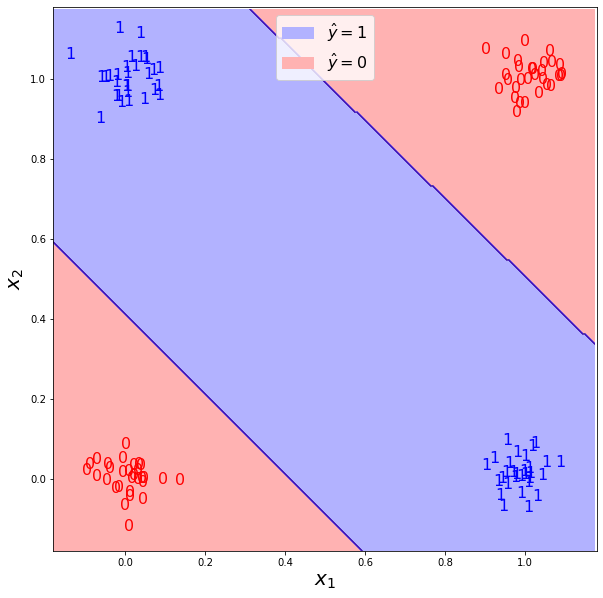

In [11]:
nn.plot(x1,x2,y)

In [12]:
nn.params()

W1 = [[-5.62861135 -5.48086793]
 [-7.27374772 -7.2632039 ]]
W2 = [ 12.06595466 -12.42656607]
b1 = [8.22338353 3.03608449]
b2 = -5.708355001801136


It does!!

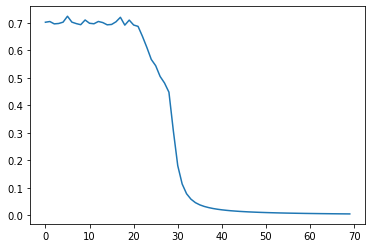

In [13]:
plt.plot(iter_dat,cost_dat)



Now, we run multiple tests and plot the evolution of the cost function. We select some good, okay, and bad examples for the figure.

In [14]:
iter_dat_list = []
cost_dat_list = []

In [15]:
for i in range(20):
    nn, iter_dat, cost_dat = run_training()
    
    iter_dat_list.append(iter_dat)
    cost_dat_list.append(cost_dat)

In [16]:
bad_is = [i for i in range(len(cost_dat_list)) if cost_dat_list[i][-1] > 0.1]
okay_is = [i for i in range(len(cost_dat_list)) if i not in bad_is and cost_dat_list[i][20] > 0.2]
good_is = [i for i in range(len(cost_dat_list)) if (i not in bad_is) and (i not in okay_is)]

Text(0, 0.5, 'Cost $C(\\theta)$\n(avg loss across entire dataset)')

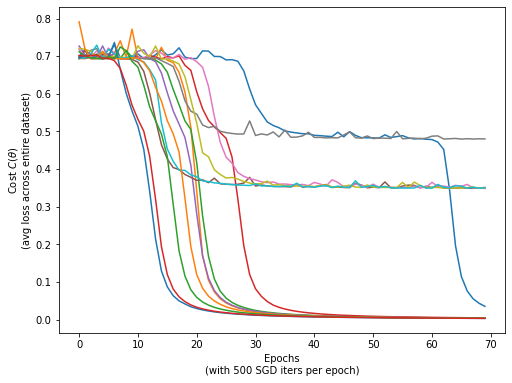

In [17]:

plt.figure(figsize=(8, 6))


for i in okay_is:
    plt.plot(iter_dat_list[i], cost_dat_list[i])
for i in bad_is:
    plt.plot(iter_dat_list[i], cost_dat_list[i])
    
for i in good_is[:4]:
    plt.plot(iter_dat_list[i], cost_dat_list[i])
    

plt.xlabel("Epochs\n(with 500 SGD iters per epoch)")
plt.ylabel("Cost $C(\\theta)$\n(avg loss across entire dataset)")